# Import

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import os
import cv2
import glob

import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical

# Load data

In [ ]:
# Load the data
from keras.datasets import cifar10
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [ ]:
# flaten y
y_train_full = y_train_full.ravel()
y_test = y_test.ravel()

Reduce train dataset to 10% so that we can run multiple models, engineered features, and tune two hyperparameters and keep the run time of the notebook with in reason.
<br>
Full dataset is used after the hyperparameter tuning complete.

In [57]:
# Reduce train dataset to 10%
x_train = x_train_full[:5000]
y_train = y_train_full[:5000]

# Machine Learning Problem

Implement Random Forrest Classifier and Support Vector Classifier to classify the image data from the CIFAR-10 dataset into the below categories:

<ul>
     <li> 0: airplane
     <li> 1: automobile
     <li> 2: bird
     <li> 3: cat
     <li> 4: deer
     <li> 5: dog
     <li> 6: frog
     <li> 7: horse
     <li> 8: ship
     <li> 9: truck
</ul>


#Data Exploration

In [ ]:
# Look at the data types of the variables
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [ ]:
# Shape of the arrayas
print('x_train shape:', x_train.shape)
print('y_train shape:', y_train.shape)
print('x_test shape:', x_test.shape)
print('y_test shape:', y_test.shape)

x_train shape: (5000, 32, 32, 3)
y_train shape: (5000,)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000,)


In [ ]:
# Take a look at the first image as an array
index = 10
x_train[index]

array([[[53, 65, 53],
        [54, 63, 52],
        [56, 60, 50],
        ...,
        [47, 51, 50],
        [41, 45, 44],
        [24, 28, 27]],

       [[46, 59, 41],
        [53, 62, 45],
        [54, 59, 44],
        ...,
        [42, 46, 45],
        [39, 43, 42],
        [28, 32, 31]],

       [[45, 59, 38],
        [50, 60, 41],
        [46, 52, 34],
        ...,
        [38, 42, 41],
        [36, 40, 39],
        [29, 33, 32]],

       ...,

       [[71, 83, 66],
        [74, 83, 66],
        [80, 85, 67],
        ...,
        [51, 54, 33],
        [46, 49, 34],
        [49, 50, 41]],

       [[75, 82, 67],
        [79, 85, 69],
        [81, 85, 67],
        ...,
        [61, 65, 41],
        [64, 67, 48],
        [48, 50, 41]],

       [[85, 83, 71],
        [85, 84, 71],
        [86, 86, 70],
        ...,
        [61, 65, 39],
        [64, 67, 46],
        [49, 50, 41]]], dtype=uint8)

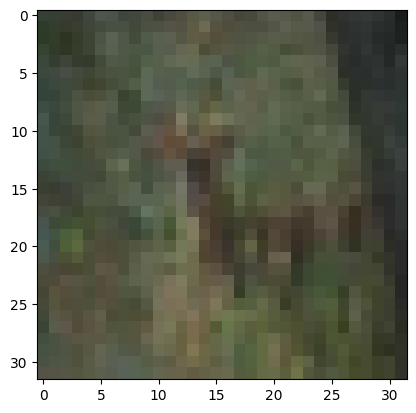

In [ ]:
# Show the image as a picture
img = plt.imshow(x_train[index])

In [ ]:
# Get the image lable
print ('the image lable is:', y_train[index])

the image lable is: 4


In [ ]:
# Get the image classification
classification = ['airplane', 'autombile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
#print the image class
print('The image class is:', classification[y_train[index]])

The image class is: deer


#Data Preprocessing

In [ ]:
# Convert the labels into a set of 10 numbers to input into the Decision tree
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

In [ ]:
# Print the new labels
print(y_train_one_hot)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
# print the new label of the current image
print('The one hot label is:', y_train_one_hot[index])

The one hot label is: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Normalize the pixels to be values between 0 and 1

x_train = x_train/255
x_test = x_test/255

In [ ]:
x_train[index]

array([[[0.20784314, 0.25490196, 0.20784314],
        [0.21176471, 0.24705882, 0.20392157],
        [0.21960784, 0.23529412, 0.19607843],
        ...,
        [0.18431373, 0.2       , 0.19607843],
        [0.16078431, 0.17647059, 0.17254902],
        [0.09411765, 0.10980392, 0.10588235]],

       [[0.18039216, 0.23137255, 0.16078431],
        [0.20784314, 0.24313725, 0.17647059],
        [0.21176471, 0.23137255, 0.17254902],
        ...,
        [0.16470588, 0.18039216, 0.17647059],
        [0.15294118, 0.16862745, 0.16470588],
        [0.10980392, 0.1254902 , 0.12156863]],

       [[0.17647059, 0.23137255, 0.14901961],
        [0.19607843, 0.23529412, 0.16078431],
        [0.18039216, 0.20392157, 0.13333333],
        ...,
        [0.14901961, 0.16470588, 0.16078431],
        [0.14117647, 0.15686275, 0.15294118],
        [0.11372549, 0.12941176, 0.1254902 ]],

       ...,

       [[0.27843137, 0.3254902 , 0.25882353],
        [0.29019608, 0.3254902 , 0.25882353],
        [0.31372549, 0

# Model Selection

In [ ]:
# Import models
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import time

models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100, 
                                            random_state=42),
}

# model comparison
def model_comparison(models):

    metric = ["accuracy", "precision_weighted", "recall_weighted", "f1_weighted"]
    scores = pd.DataFrame(index=metric, columns=models.keys())
    
    # Flatten the images into 1D arrays
    x_train_flat = x_train.reshape((x_train.shape[0], -1))
    x_test_flat = x_test.reshape((x_test.shape[0], -1))
    
    y_train_sample = y_train
    y_test_sample = y_test
    
    for name, model in models.items():
        
        start = time.time()
        
        model.fit(x_train_flat, y_train_sample)
        y_pred = model.predict(x_test_flat)
        
        scores.loc["accuracy", name] = accuracy_score(y_test_sample, y_pred)
        scores.loc["precision_weighted", name] = precision_score(y_test_sample, y_pred, average="weighted")
        scores.loc["recall_weighted", name] = recall_score(y_test_sample, y_pred, average="weighted")
        scores.loc["f1_weighted", name] = f1_score(y_test_sample, y_pred, average="weighted")
        
        time_taken = time.time() - start
        
        scores.loc["training_time", name] = time_taken
        
        print(f"Finished training {name}")
    return scores

model_comparison_df = model_comparison(models)
model_comparison_df

Finished training Decision Tree
Finished training Random Forest


,Decision Tree,Random Forest
accuracy,0.2223,0.3963
precision_weighted,0.223028,0.392771
recall_weighted,0.2223,0.3963
f1_weighted,0.222038,0.390171
training_time,29.162465,28.007308


# Feature Engineering

## Histogram of Oriented Gradients

Histogram of Oriented Gradients (HOG) is a feature extraction technique used in computer vision and image processing for object detection and image classification tasks. It captures the local distribution of gradient orientations in an image and represents it as a feature vector. The HOG feature extraction technique is particularly effective in capturing the shape and appearance of objects in images. It can encode information about edges, contours, and texture patterns, providing discriminative features for differentiating objects of interest.

In [ ]:
from skimage.feature import hog
from skimage.transform import resize

# function to extract HOG features
def hog_features(data):
    features = []
    hog_images = []
    for i in range(len(data)):
        resized_img = resize(data[i], (32*4, 32*4)) 
        fd, hog_image = hog(resized_img, 
                            orientations=9, 
                            pixels_per_cell=(8, 8), 
                            cells_per_block=(2, 2),
                            visualize=True, 
                            channel_axis=-1)
        features.append(fd)
        hog_images.append(hog_image)
    
    return features, hog_images

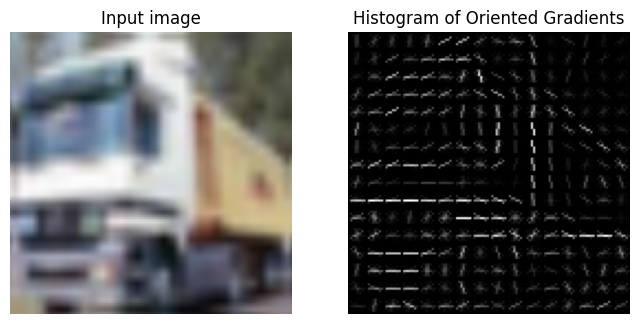

In [ ]:
# review HOG
from skimage import exposure

dataset = x_train[:10]*255

# get features and image sets
hog_features_train, hog_images_train = hog_features(dataset)

# plot base image against HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True)

image = dataset[1].astype(np.uint8)
resized_image = resize(image, (32*4, 32*4))
hog_image = hog_images_train[1]

ax1.axis('off')
ax1.imshow(resized_image, cmap=plt.cm.gray)
ax1.set_title('Input image')

# Rescale histogram for better display
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 50))

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
plt.show()


In [ ]:
# Extract HOG features
def extract_hog_features(dataset):
    features = []
    for image in dataset:
        hog_features = hog(image, 
                           orientations=9, 
                           pixels_per_cell=(8, 8), 
                           cells_per_block=(2, 2),
                           channel_axis=-1)
        features.append(hog_features)
    return np.array(features)
    
# Extract HOG features
x_train_hog = extract_hog_features(x_train)
x_test_hog = extract_hog_features(x_test)

In [ ]:
# Shape of the arrayas
print('x_train_hog shape:', x_train_hog.shape)

x_train_hog shape: (5000, 324)


## Gabor Features
Gabor filters are a family of linear filters that are designed to resemble the response of simple cells in the human visual system. These filters are able to capture both spatial and frequency information from an image. By convolving an image with Gabor filters of different frequencies and orientations, Gabor feature extraction extracts local texture information from the image. The resulting feature vectors represent the distribution of local texture patterns in different frequencies and orientations.

In [ ]:
from skimage.filters import gabor

# Extract Gabor features
def extract_gabor_features(dataset):
    features = []
    for image in dataset:
        channel_features = []
        for channel in image.transpose((2, 0, 1)):  # Iterate over channels
            gabor_features = np.squeeze(gabor(channel, frequency=0.6))
            channel_features.append(gabor_features)
        features.append(np.concatenate(channel_features))
    return np.array(features)

# Extract Gabor features
x_train_gabor = extract_gabor_features(x_train)
x_test_gabor = extract_gabor_features(x_test)

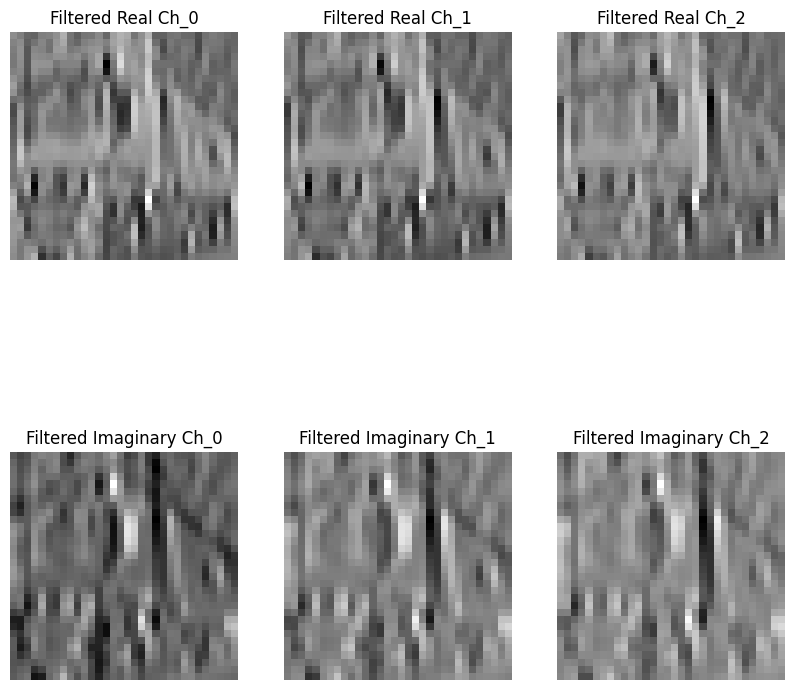

In [ ]:
# show the gabor filter
fig, axs = plt.subplots(2, 3, figsize=(10, 10))

index = 1

axs[0][0].imshow(x_train_gabor[index][0], cmap="gray")
axs[0][0].title.set_text("Filtered Real Ch_0")
axs[0][0].axis("off")

axs[0][1].imshow(x_train_gabor[index][2], cmap="gray")
axs[0][1].title.set_text("Filtered Real Ch_1")
axs[0][1].axis("off")

axs[0][2].imshow(x_train_gabor[index][4], cmap="gray")
axs[0][2].title.set_text("Filtered Real Ch_2")
axs[0][2].axis("off")

axs[1][0].imshow(x_train_gabor[index][1], cmap="gray")
axs[1][0].title.set_text("Filtered Imaginary Ch_0")
axs[1][0].axis("off")

axs[1][1].imshow(x_train_gabor[index][3], cmap="gray")
axs[1][1].title.set_text("Filtered Imaginary Ch_1")
axs[1][1].axis("off")

axs[1][2].imshow(x_train_gabor[index][5], cmap="gray")
axs[1][2].title.set_text("Filtered Imaginary Ch_2")
axs[1][2].axis("off")

plt.show()

In [ ]:
# Reshape the features before concatenation
x_train_gabor_reshaped = x_train_gabor.reshape(x_train_gabor.shape[0], -1)
x_test_gabor_reshaped = x_test_gabor.reshape(x_test_gabor.shape[0], -1)

print(x_train_gabor_reshaped.shape)
print(x_test_gabor_reshaped.shape)

(5000, 6144)
(10000, 6144)


In [ ]:
# Shape of the arrayas
print('x_train_gabor shape:', x_train_gabor_reshaped.shape)
print('x_train_hog shape:', x_train_hog.shape)

x_train_gabor shape: (5000, 6144)
x_train_hog shape: (5000, 324)


## Color Histogram features
They provide a concise representation of the color content within an image by quantizing the color space into discrete bins and counting the number of pixels that fall into each bin. The color histogram represents the frequency of occurrence of different color values or ranges in the image.


In [ ]:
x_train.shape

(5000, 32, 32, 3)

In [ ]:
# Extract Color Histogram features from training set

def color_hist(dataset):
    dataset_hist = []
    
    for img in dataset:
        hist_features = []
        
        for channel in range(3): # Iterate over RGB color channels
            hist, _ = np.histogram(img[:, :, channel], bins=256, range=(0, 256))
            hist_features.extend(hist)
        dataset_hist.append(hist_features)

    return np.array(dataset_hist)

# extract with unscalled colour values
x_train_hist = color_hist(x_train*255)
x_test_hist = color_hist(x_test*255)

print("shape: ", x_train_hist.shape)

shape:  (5000, 768)


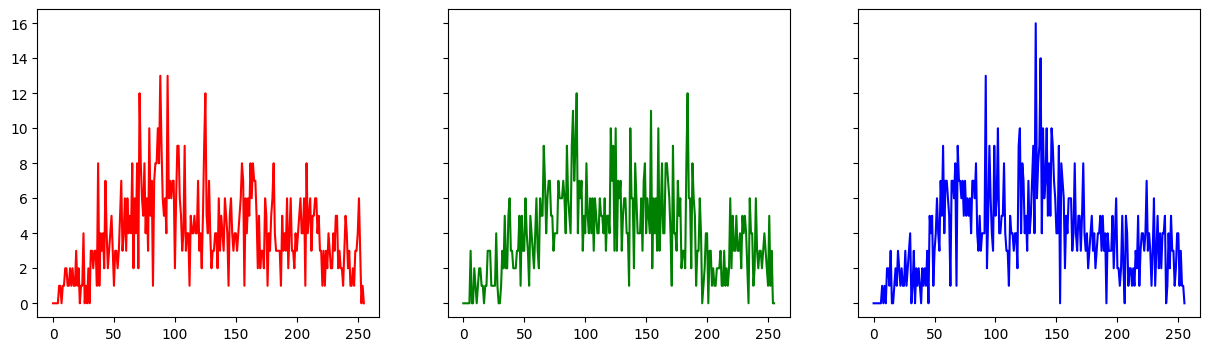

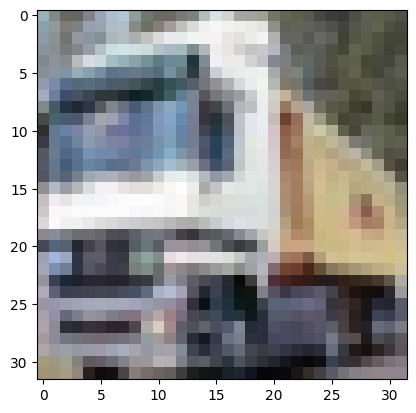

In [ ]:
#plot color histogram
def plot_color_hist(data, hist_data):

    index = 1

    red_hist = hist_data[index][0:256]
    green_hist = hist_data[index][256:512]
    blue_hist = hist_data[index][512:768]
    
    fig, axs = plt.subplots(1, 3, figsize=(15, 4), sharey=True)
    axs[0].plot(red_hist, color='r')
    axs[1].plot(green_hist, color='g')
    axs[2].plot(blue_hist, color='b')
    plt.show()

    plt.imshow(data[index])
    
plot_color_hist(x_train, x_train_hist)

## Compare Engineered Features

In [ ]:

eng_feat_sets = { "HoG": {
                        "x_train": x_train_hog,
                        "x_test": x_test_hog
                    },
                 "Gabor": {
                        "x_train": x_train_gabor_reshaped,
                        "x_test": x_test_gabor_reshaped
                 },
                 "Colour Hist": {
                    "x_train": x_train_hist,
                    "x_test": x_test_hist
                 }
                }



In [ ]:
def run_model(x_train, y_train, x_test, y_test):
    # Create the random forest classifier
    clf = RandomForestClassifier(n_estimators=100, random_state=42)

    # Train the random forest model
    clf.fit(x_train, y_train)

    # Make predictions on the test set
    y_pred = clf.predict(x_test)

    # Calculate the accuracy of the model
    accuracy = accuracy_score(y_test, y_pred)

    
    return accuracy

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# test feature sets

for feature_set_name, feature_set in eng_feat_sets.items():
    x_train = feature_set["x_train"]
    x_test = feature_set["x_test"]

    accuracy = run_model(x_train, y_train.ravel(), x_test, y_test.ravel())
    print(f"Accuracy using {feature_set_name}: {accuracy}")

Accuracy using HoG: 0.4651
Accuracy using Gabor: 0.342
Accuracy using Colour Hist: 0.2928


# Model Development

## Hyperparameter Tuning

Here we have implemented a Random Forrest Classifier and tuned the n_estimators (number of trees in the forest) and max_features, using grid search.

In [ ]:
# Pure random forest deployment
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV


x_train = eng_feat_sets['HoG']['x_train']
x_test = eng_feat_sets['HoG']['x_test']

'''
DID NOT INCREASE ACCURACY ~ 35%
x_train = np.concatenate((eng_feat_sets['HoG']['x_train'], eng_feat_sets['Gabor']['x_train']),
                     axis = 1)
x_test = np.concatenate((eng_feat_sets['HoG']['x_test'], eng_feat_sets['Gabor']['x_test']),
                     axis = 1)
'''

# parameters to be tuned
param_grid = {
    'n_estimators': [ 40, 80, 160],
    'max_features': [ 5, 10, 20],
}

# Create the random forest classifier
rfc = RandomForestClassifier(min_samples_leaf = 6,
                             min_samples_split = 12,
                             random_state = 42)

# grid search with the param grid
gird_search = GridSearchCV(rfc, 
                   param_grid,
                   n_jobs = -1,  # use all processors
                   cv = 5,       # the number of folds in a (Stratified)KFold
                   verbose = 1)  # show status

# Train the random forest model
gird_search.fit(x_train, y_train)

# Best Paramters
print("Best Model prarmeters: ", gird_search.best_params_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Model prarmeters:  {'max_features': 5, 'n_estimators': 160}


In [ ]:
# cv results
cv_results = pd.DataFrame(gird_search.cv_results_)

# drop unnecessary columns
cv_results.drop(columns = ['std_fit_time', 
                           'mean_score_time', 
                           'std_score_time', 
                           'params',
                           'split0_test_score',
                            'split1_test_score',
                            'split2_test_score',
                            'split3_test_score',
                            'split4_test_score',
                            'std_test_score'], inplace = True)

# order by rank_test_score
cv_results.sort_values(by = 'rank_test_score').head(10)

,mean_fit_time,param_max_features,param_n_estimators,mean_test_score,rank_test_score
2,5.544631,5,160,0.4708,1
8,16.115765,20,160,0.4652,2
5,8.884376,10,160,0.4588,3
1,4.500709,5,80,0.4522,4
7,8.173736,20,80,0.4492,5
4,4.142259,10,80,0.4448,6
6,4.201714,20,40,0.4204,7
0,1.092880,5,40,0.4198,8
3,2.532733,10,40,0.4138,9


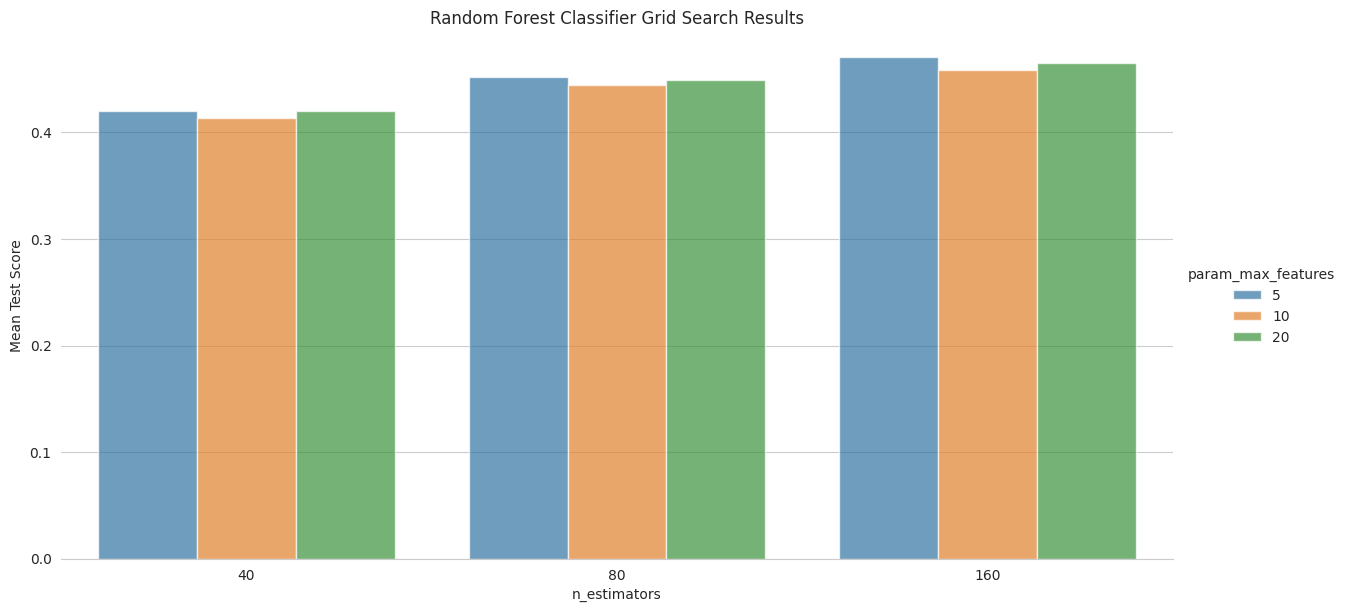

In [ ]:
# bar grouped by n_estimators

sns.set_style("whitegrid")

g = sns.catplot(x = 'param_n_estimators',
                y = 'mean_test_score',
                hue = 'param_max_features',
                data = cv_results,
                kind = 'bar',
                alpha = 0.7,
                height = 6,
                aspect = 2)

g.despine(left = True)
g.set_ylabels('Mean Test Score')
g.set_xlabels('n_estimators')
plt.title('Random Forest Classifier Grid Search Results')
plt.show()

<Axes: xlabel='param_max_features', ylabel='mean_fit_time'>

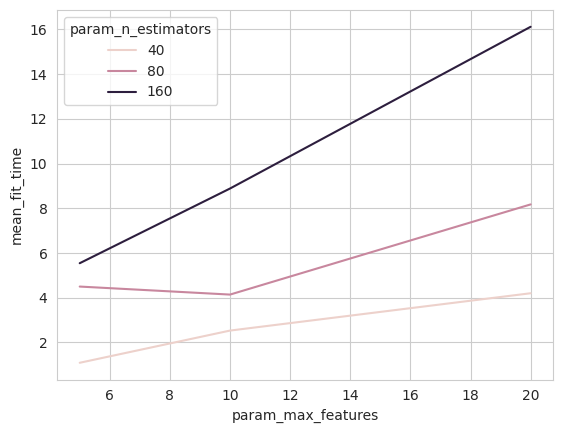

In [ ]:
# time vs max_features vs n_estimators line plot
sns.lineplot(x = 'param_max_features',
                y = 'mean_fit_time',
                hue = 'param_n_estimators',
                data = cv_results)

Increasing the number of tress in the forrest (n_estimators) shows a clear increase in accuracy of the model, while reducing or increasing max_features shows no correlation in improving the accuracy, while also increasing training time.  

## Run Model with Full dataset

In [ ]:
# model with tuned hyper parameters
clf = RandomForestClassifier(n_estimators = gird_search.best_params_['n_estimators'],
                             max_features = gird_search.best_params_['max_features'],
                             min_samples_leaf = 6,
                             min_samples_split = 12,
                             random_state = 42)

# full dataset with features extracted
x_train_hog = extract_hog_features(x_train_full)

In [ ]:
# Train the random forest model
clf.fit(x_train_hog, y_train_full)

# Make predictions on the test set
y_pred = clf.predict(x_test_hog)


# Model Perfomance

## Confusion Matrix

Accuracy: 0.5269


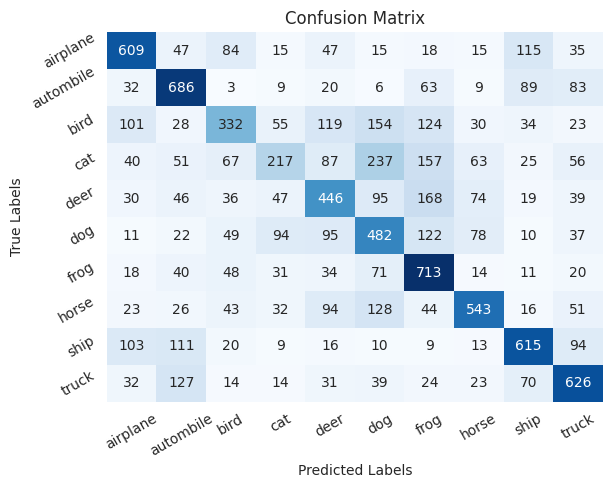

In [ ]:
# Function to get accuracy of model and plot confusion matrix
from sklearn.metrics import accuracy_score, confusion_matrix

def performance(y_test, y_pred):

  # Calculate the accuracy of the model
  accuracy = accuracy_score(y_test.ravel(), y_pred)
  print(f"Accuracy: {accuracy}")

  cm = confusion_matrix(y_test.ravel(), y_pred)

  # plot confusion matrix as heatmap
  ax = plt.axes()
  sns.heatmap(cm, 
              annot=True, 
              cmap='Blues', 
              fmt='d', 
              cbar=False)

  # set axis labels
  plt.title('Confusion Matrix')
  plt.xlabel('Predicted Labels')
  plt.ylabel('True Labels') 

  # set tick labels
  ax.set_xticklabels(classification, rotation = 30)
  ax.set_yticklabels(classification, rotation = 30)

  plt.show()

performance(y_test, y_pred)

## Correct Predictions by Class

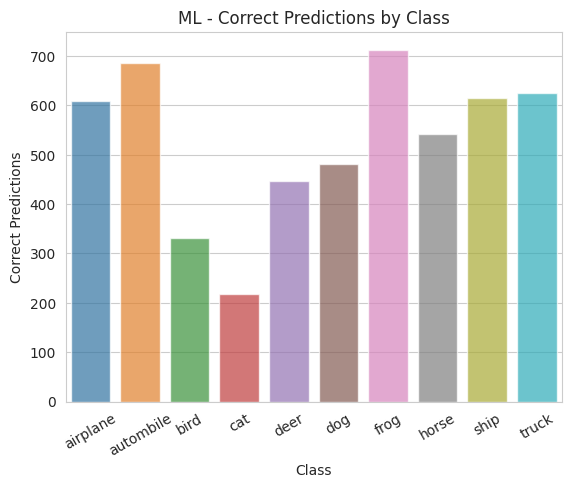

In [ ]:
# bar chart of correct predictions by class
def correct_predictions(y_test, y_pred):
    # correct predictions by class
    correct = np.zeros(10)
    for i in range(len(y_test)):
        if y_test[i] == y_pred[i]:
            correct[y_test[i]] += 1
    
    # plot bar chart
    sns.barplot(x = classification, 
                y = correct,
                alpha = 0.7)
    plt.xticks(rotation = 30)
    plt.xlabel('Class')
    plt.ylabel('Correct Predictions')
    plt.title('ML - Correct Predictions by Class')
    plt.show()
    
correct_predictions(y_test, y_pred)

## Probability distribution and ROC Curve

Here we have provided visualisations for each class of the probability vs the rest, as well as the ROC curve. These highlight how well the algorithm is at separating each class from the rest of the dataset.


In [ ]:
# Code source 
# https://github.com/vinyluis/Articles/blob/main/ROC%20Curve%20and%20ROC%20AUC/ROC%20Curve%20-%20Multiclass.ipynb

from sklearn.metrics import confusion_matrix

def calculate_tpr_fpr(y_real, y_pred):
    '''
    Calculates the True Positive Rate (tpr) and the True Negative Rate (fpr) based on real and predicted observations
    
    Args:
        y_real: The list or series with the real classes
        y_pred: The list or series with the predicted classes
        
    Returns:
        tpr: The True Positive Rate of the classifier
        fpr: The False Positive Rate of the classifier
    '''
    
    # Calculates the confusion matrix and recover each element
    cm = confusion_matrix(y_real, y_pred)
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]
    TP = cm[1, 1]
    
    # Calculates tpr and fpr
    tpr =  TP/(TP + FN) # sensitivity - true positive rate
    fpr = 1 - TN/(TN+FP) # 1-specificity - false positive rate
    
    return tpr, fpr





def get_all_roc_coordinates(y_real, y_proba):
    '''
    Calculates all the ROC Curve coordinates (tpr and fpr) by considering each point as a threshold for the predicion of the class.
    
    Args:
        y_real: The list or series with the real classes.
        y_proba: The array with the probabilities for each class, obtained by using the `.predict_proba()` method.
        
    Returns:
        tpr_list: The list of TPRs representing each threshold.
        fpr_list: The list of FPRs representing each threshold.
    '''
    tpr_list = [0]
    fpr_list = [0]
    for i in range(len(y_proba)):
        threshold = y_proba[i]
        y_pred = y_proba >= threshold
        tpr, fpr = calculate_tpr_fpr(y_real, y_pred)
        tpr_list.append(tpr)
        fpr_list.append(fpr)
    return tpr_list, fpr_list





def plot_roc_curve(tpr, fpr, scatter = True, ax = None):
    '''
    Plots the ROC Curve by using the list of coordinates (tpr and fpr).
    
    Args:
        tpr: The list of TPRs representing each coordinate.
        fpr: The list of FPRs representing each coordinate.
        scatter: When True, the points used on the calculation will be plotted with the line (default = True).
    '''
    if ax == None:
        plt.figure(figsize = (5, 5))
        ax = plt.axes()
    
    if scatter:
        sns.scatterplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = fpr, y = tpr, ax = ax)
    sns.lineplot(x = [0, 1], y = [0, 1], color = 'green', ax = ax)
    plt.xlim(-0.05, 1.05)
    plt.ylim(-0.05, 1.05)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")



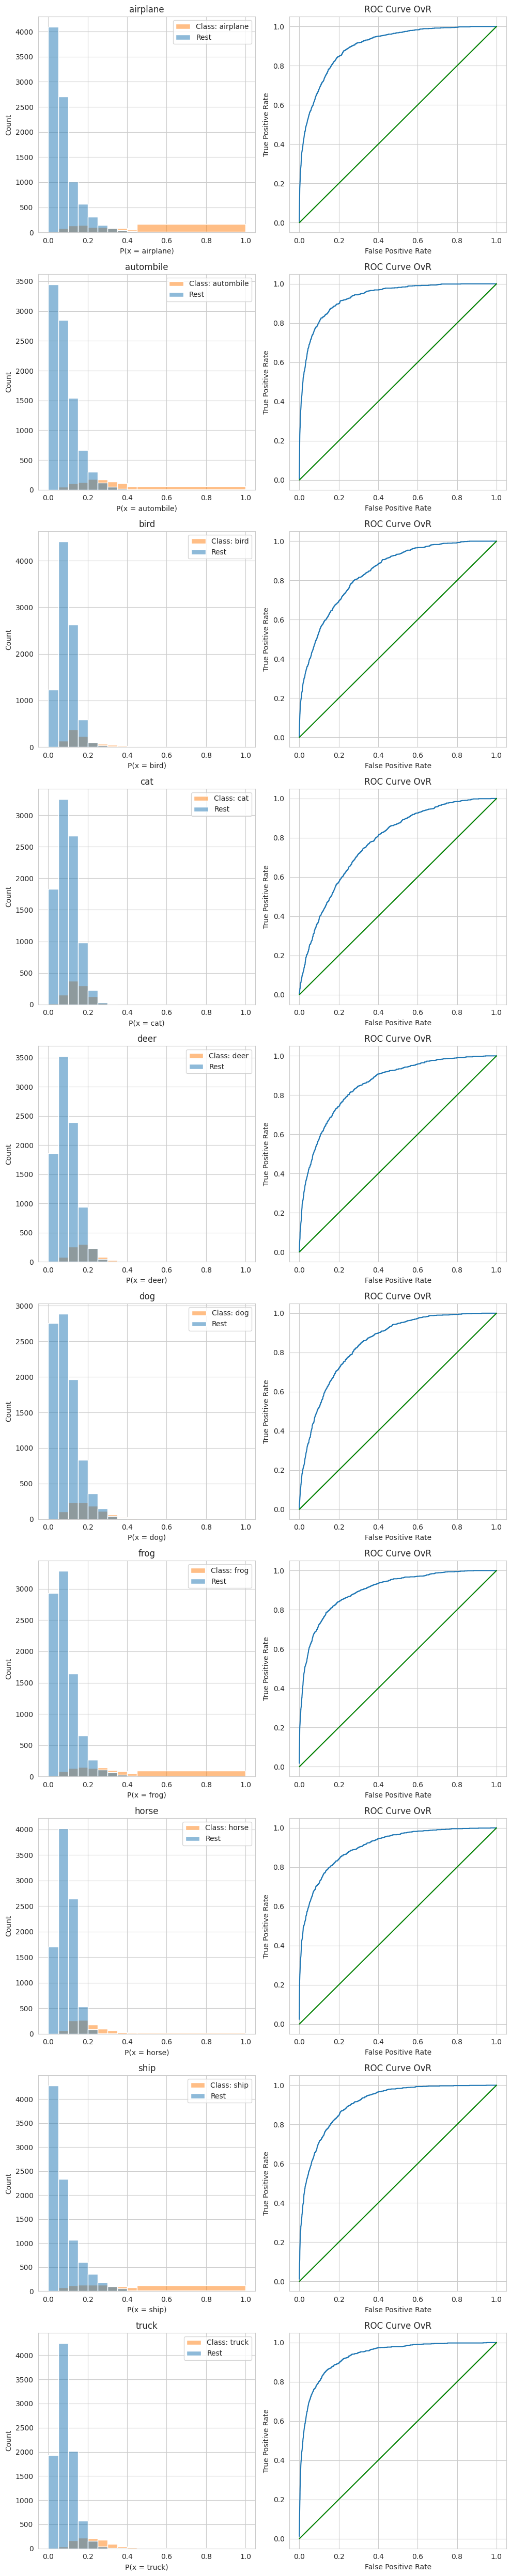

In [ ]:
# Plots the Probability Distributions and the ROC Curves One vs Rest
# Code source 
# https://towardsdatascience.com/multiclass-classification-evaluation-with-roc-curves-and-roc-auc-294fd4617e3a

from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize = (10, 50))
bins = [i/20 for i in range(10)] + [1]
classes = clf.classes_
roc_auc_ovr = {}
y_proba = clf.predict_proba(x_test_hog)

col_0 = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
col_1 = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

for i in range(len(classes)):
    # get the class
    img_class = classes[i]
    class_name = classification[i]
    
    df_aux = pd.DataFrame(x_test)
    y_df = pd.DataFrame(y_test)
    
    df_aux['class'] = [1 if y == img_class else 0 for y in y_test]

    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop = True)
    
    # plot the probability distribution
    ax = plt.subplot(10, 2, col_0[i])
    sns.histplot(x = "prob", data = df_aux, hue = 'class', color = 'b', ax = ax, bins = bins)
    ax.set_title(class_name)
    ax.legend([f"Class: {class_name}", "Rest"])
    ax.set_xlabel(f"P(x = {class_name})")
    
    # Calculates the ROC Coordinates and plots the ROC Curves
    ax_bottom = plt.subplot(10, 2, col_1[i])
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    ax_bottom.set_title("ROC Curve OvR")
    
    # Calculates the ROC AUC OvR
    roc_auc_ovr[img_class] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()

In [ ]:
# Displays the ROC AUC for each class
avg_roc_auc = 0
i = 0
for k in roc_auc_ovr:
    avg_roc_auc += roc_auc_ovr[k]
    i += 1
    class_name = classification[k]
    print(f"{class_name} ROC AUC OvR: {roc_auc_ovr[k]:.4f}")
print(f"average ROC AUC OvR: {avg_roc_auc/i:.4f}")

airplane ROC AUC OvR: 0.9031
autombile ROC AUC OvR: 0.9339
bird ROC AUC OvR: 0.8431
cat ROC AUC OvR: 0.7781
deer ROC AUC OvR: 0.8554
dog ROC AUC OvR: 0.8478
frog ROC AUC OvR: 0.9015
horse ROC AUC OvR: 0.9074
ship ROC AUC OvR: 0.9105
truck ROC AUC OvR: 0.9338
average ROC AUC OvR: 0.8815
